/home/oleksanf/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


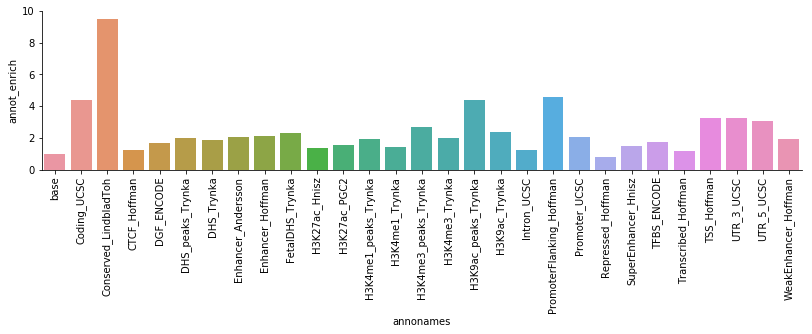

In [21]:
%matplotlib inline
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pattern = '/home/oleksanf/vmshare/data/mixer_analysis/plsa_mixer/{}.models={}.outtag=run12.fit.json'
traits=[ 'PGC_SCZ_2014_EUR'] #, 'GIANT_HEIGHT_2018_UKB' ]
model_index = 16 # all features combined
for trait in traits:
    fname = pattern.format(trait, model_index)
    data_tmp = json.loads(open(fname).read())
    

    df=pd.DataFrame({'annot_enrich':data_tmp['m16']['annot_enrich'], 'annonames':data_tmp['options']['annonames']})
    df=df[~df['annonames'].str.contains('extend')].copy()
    df['annonames'] = [x.replace('.bed', '') for x in df['annonames'].values]
    #plt.plot([10, 10])
    #f, ax = plt.subplots(figsize=(20, 5))
    g=sns.catplot(x="annonames", y="annot_enrich", kind='bar', data=df, size=3, aspect=4)
    g.set_xticklabels(rotation=90);


/home/oleksanf/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


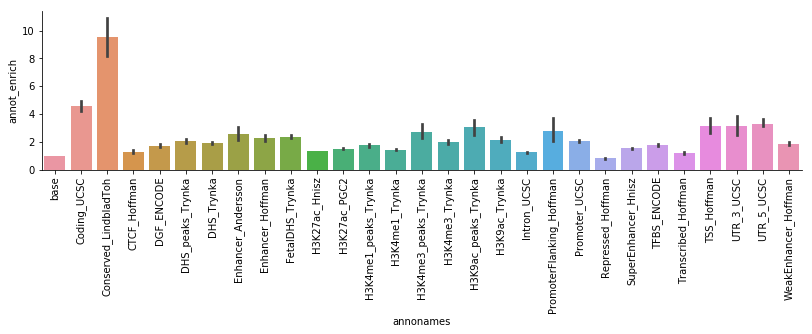

In [79]:
# plot from simulated data after fitting m16 model
g=sns.catplot(x="annonames", y="annot_enrich", kind='bar', data=df, size=3, aspect=4)
g.set_xticklabels(rotation=90);

In [8]:
import pandas as pd
bim_file='/home/oleksanf/vmshare/data/bfile_merged/chr@.bim'
chr2use = list(range(1, 23))
ref=pd.concat([pd.read_csv(bim_file.replace('@', str(chr_label)), header=None, names='CHR SNP GP BP A1 A2'.split(), sep='\t') for chr_label in chr2use])


In [13]:
for rep in range(1, 11):
    ref[['SNP']].sample(1000000).to_csv('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run3/defvec_rand1M_rep={}.snps'.format(rep), index=False, header=None, sep='\t')

In [1]:
import precimed
import precimed.mixer
import precimed.mixer.libbgmg
import precimed.mixer.utils
import precimed.mixer.cli
import precimed.mixer.figures
import pandas as pd
chr2use = range(1, 23)
libbgmg = precimed.mixer.libbgmg.LibBgmg('/home/oleksanf/github/mixer/src/build/lib/libbgmg.so', dispose=True)
trait1_file=''; trait2_file=''; exclude=''; extract='';
libbgmg.set_option('ld_format_version', 0)


frq_file='/home/oleksanf/vmshare/data/bfile_merged/chr@.frq'
plink_ld_bin0='/home/oleksanf/vmshare/data/hapgen_ldmat2_plink/bfile_merged_ldmat_p01_SNPwind50k_chr@.ld.bin'

libbgmg.init(bim_file, frq_file, chr2use, trait1_file, trait2_file, exclude, extract)
for chr_label in chr2use: 
    libbgmg.set_ld_r2_coo_from_file(int(chr_label), plink_ld_bin0.replace('@', str(chr_label)))
    libbgmg.set_ld_r2_csr(int(chr_label))
libbgmg.set_weights_randprune(1, 0.1)

ref=pd.concat([pd.read_csv(bim_file.replace('@', str(chr_label)), header=None, names='CHR SNP GP BP A1 A2'.split(), sep='\t') for chr_label in chr2use])


NameError: name 'pd' is not defined

In [27]:
for rep in range(2, 10):
    libbgmg.set_option('seed', 6643+rep)
    libbgmg.set_weights_randprune(1, 0.1)
    ref[libbgmg.weights>0]['SNP'].to_csv('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run2/defvec_hardprune_p1_rep={}.snps'.format(rep), index=False, header=None, sep='\t')

/home/oleksanf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [16]:

rep=1

ref[libbgmg.weights>0]['SNP'].to_csv('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run2/defvec_hardprune_p1_rep={}.snps'.format(rep), index=False, header=None, sep='\t')

/home/oleksanf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [138]:
# annotate HAPGEN reference to basedline annotation model using https://github.com/mkanai/eas_partitioned_ldscore
# see ~/vmshare/data/SIMU_PLSA_MIXER/baseline_hapgen.sh script (note: "conda activate bx" with bioconductor or biopython)

fname = '/home/oleksanf/vmshare/data/mixer_analysis/plsa_mixer/PGC_SCZ_2014_EUR.models=16.outtag=run12.fit.json'
data_tmp = json.loads(open(fname).read())

annot_file='/home/oleksanf/vmshare/data/SIMU_PLSA_MIXER/bfile_merged/baseline.chr@.annot.gz'
df_annot = pd.concat([pd.read_csv(annot_file.replace('@', str(chr_label)), sep='\t') for chr_label in chr2use])
snps_sig2_annot = np.dot(df_annot[[x.replace('.bed', '') for x in data_tmp['m16']['params']['annonames']]].values.astype(np.float32),
                         np.array(data_tmp['m16']['params']['sig2_annot']).astype(np.float32))


In [141]:
pd.DataFrame({'SNP':ref['SNP'].values,
              'CHR':ref['CHR'].values,
              'BP':ref['BP'].values,
              'MAF':libbgmg.mafvec,
              'TLD':libbgmg.ld_tag_r2_sum,
              'ANNOT':snps_sig2_annot}).to_csv('/home/oleksanf/vmshare/data/SIMU_PLSA_MIXER/snps_info.csv', sep='\t',index=False)

In [214]:
if 0:
    snp_info = pd.read_csv('/home/oleksanf/vmshare/data/SIMU_PLSA_MIXER/snps_info.csv',sep='\t')
    snp_info['HET'] = 2 * np.multiply(snp_info['MAF'].values, 1-snp_info['MAF'].values)
h2_vals='0.1 0.4 0.7'.split()
pi_vals='1e-4 1e-3 1e-2'.split()
annot_vals=['SCZ']
s_vals='-0.50 -0.25 0.00 0.25'.split()
l_vals='-0.50 -0.25 0.00 0.25'.split()
rep_vals='0 1 2 3 4 5 6 7 8 9'.split()

folder = '/home/oleksanf/vmshare/data/SIMU_PLSA_MIXER/run1'
i=0
#for h2 in h2_vals:
for pi in pi_vals:
    for annot in annot_vals:
        for s in s_vals:
            for l in l_vals:
                for rep in rep_vals:
                    pref = 'simu_h2=nan_pi={}_annot={}_s={}_l={}_rep={}'.format(pi, annot, s, l, rep)
                    print(pref)
                    df = snp_info.sample(frac=float(pi), random_state=int(rep)).copy()
  
                    sig2_beta_vec = np.multiply(df['ANNOT'].values,
                                        np.multiply(np.power(df['HET'].values, float(s)),
                                                    np.power(df['TLD'].values, float(l))))
                    np.random.seed(int(rep))
                    df['BETA'] = np.random.normal(0, np.sqrt(sig2_beta_vec))
                    df[['SNP', 'BETA']].to_csv('{}/{}.beta'.format(folder, pref), index=False, header=False, sep='\t')
        

#len(h2_vals) * len(pi_vals) * len(annot_vals) * len(s_vals) * len(l_vals) * len(rep_vals)


simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=0
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=1
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=2
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=3
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=4
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=5
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=6
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=7
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=8
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.50_rep=9
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=0
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=1
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=2
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=3
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=4
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=5
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=6
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=7
simu_h2=nan_pi=1e-4_annot=SCZ_s=-0.50_l=-0.25_rep=8
simu_h2=nan_

simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=1
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=2
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=3
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=4
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=5
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=6
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=7
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=8
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.50_rep=9
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=0
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=1
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=2
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=3
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=4
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=5
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=6
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=7
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=8
simu_h2=nan_pi=1e-3_annot=SCZ_s=-0.50_l=-0.25_rep=9
simu_h2=nan_

simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=2
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=3
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=4
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=5
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=6
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=7
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=8
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.50_rep=9
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=0
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=1
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=2
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=3
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=4
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=5
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=6
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=7
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=8
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=-0.25_rep=9
simu_h2=nan_pi=1e-2_annot=SCZ_s=-0.50_l=0.00_rep=0
simu_h2=nan_p

In [25]:
files

['/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=8_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=4_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=0_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=3_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=7_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=6_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep=1_tag=run1_model=16.json',
 '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h

In [81]:
df.sort_values('true_tag')

,fname,true_h2,true_pi,true_annot,true_s,true_l,true_rep,true_tag,true_model,pi,sig2_beta,sig2_zeroA,sig2_zeroL,s,l,h2,enrich,sum_weights
0,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,0,run1,15,0.000156,0.005211,1.047676,NaN,-0.540500,-0.358682,0.911319,"[1.0, 0.9969536662101746, 1.0054067373275757, ...",691928.0
2,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,1,run1,15,0.000162,0.003919,1.043357,NaN,-0.498197,-0.283770,0.887806,"[1.0, 0.9734808802604675, 0.992817223072052, 0...",691577.0
3,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,2,run1,15,0.000167,0.002026,1.042368,NaN,-0.623627,-0.176882,0.898771,"[1.0, 0.9713243246078491, 0.9894472360610962, ...",691356.0
4,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,4,run1,15,0.000161,0.002046,1.045560,NaN,-0.614490,-0.168019,0.892287,"[1.0, 0.968052327632904, 0.9877482056617737, 0...",691642.0
7,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,3,run1,15,0.000154,0.005063,1.041926,NaN,-0.554654,-0.366289,0.869275,"[1.0, 1.0012893676757812, 1.0075775384902954, ...",691653.0
1,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,0,run2,15,0.000093,0.002139,1.025320,1.287330e-07,-0.711991,-0.152174,0.682304,"[1.0, 0.9809383749961853, 0.993437647819519, 0...",691924.0
5,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,1,run2,15,0.000090,0.002046,1.020139,1.370781e-07,-0.665685,-0.119101,0.667012,"[1.0, 0.9662722945213318, 0.985973060131073, 0...",691573.0
6,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,4,run2,15,0.000101,0.001013,1.022653,1.328345e-07,-0.765736,-0.012307,0.680794,"[1.0, 0.9608240723609924, 0.9815889596939087, ...",691638.0
8,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,3,run2,15,0.000090,0.002254,1.022462,1.152493e-07,-0.719754,-0.166885,0.664414,"[1.0, 0.9855492115020752, 0.9958688020706177, ...",691647.0
9,simu_h2=0.7_pi=1e-4_annot=NONE_s=-0.50_l=-0.25...,0.7,0.0001,NONE,-0.5,-0.25,2,run2,15,0.000092,0.001180,1.018441,1.382289e-07,-0.736255,-0.012310,0.686572,"[1.0, 0.9562385082244873, 0.9794213175773621, ...",691349.0


In [79]:
import json
import glob
import pandas as pd

def insert_key_to_dictionary_as_list(key, value, df_data):
    if key not in df_data:
        df_data[key] = []
    df_data[key].append(value)

run_tag = 'run2'
df_data = {}; dfs=[];
files = glob.glob('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/{}/*json'.format(run_tag))
#files = glob.glob('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/*pi=1e-3*NONE*model=16*json')
#files = glob.glob('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/*pi=1e-3*SCZ*model=16*json')
for fname in files:
    #for rep in range(10):
    #fname = '/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/run1/simu_h2=0.7_pi=1e-3_annot=NONE_s=-0.50_l=-0.25_rep={}_tag=run1_model=15.json'.format(rep)
    try:
        data = json.loads(open(fname).read())
    except:
        continue
    
    model = [k for k in data.keys() if k[0]=='m'][0]
    params = data[model]['params']
    insert_key_to_dictionary_as_list('fname', fname.split('/')[-1], df_data)
    for x in fname.split('/')[-1].replace('.json', '').replace('simu_', '').split('_'):
        insert_key_to_dictionary_as_list('true_' + x.split('=')[0], x.split('=')[1], df_data)
    for what in 'pi sig2_beta sig2_zeroA sig2_zeroL s l'.split():
        if what not in params: params[what] = ""
        insert_key_to_dictionary_as_list(what, str(params[what]).replace('[', '').replace(']', ''), df_data)
    insert_key_to_dictionary_as_list('h2', data[model]['annot_h2'][0], df_data)        
    insert_key_to_dictionary_as_list('enrich', str(data[model]['annot_enrich']), df_data)        
    insert_key_to_dictionary_as_list('sum_weights', str(data['options']['sum_weights']), df_data)

    df=pd.DataFrame({'annot_enrich':data[model]['annot_enrich'], 'annonames':data['options']['annonames']})
    df=df[~df['annonames'].str.contains('extend')].copy()
    df['annonames'] = [x.replace('.bed', '') for x in df['annonames'].values]
    dfs.append(df)

#for k in df_data: print(k, len(df_data[k]))
df=pd.DataFrame(df_data)
for c in df.columns: df[c]=pd.to_numeric(df[c], errors='ignore')
    
df.to_csv('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/{}.csv'.format(run_tag),sep='\t', index=False)
df.to_excel('/home/oleksanf/vmshare/data/saga/SIMU_PLSA_MIXER/{}.xlsx'.format(run_tag),index=False)

if 0:
    df=pd.concat(dfs)
    g=sns.catplot(x="annonames", y="annot_enrich", kind='bar', data=df, size=3, aspect=4)
    g.set_xticklabels(rotation=90);

df=pd.DataFrame(df_data)
for c in df.columns: df[c]=pd.to_numeric(df[c], errors='ignore')
df[['true_tag',  'true_pi', 'true_annot', 'true_model', 's', 'l', 'pi', 'h2', 'sig2_zeroA', 'sig2_zeroL']].groupby(['true_tag', 'true_pi', 'true_annot', 'true_model']).agg({'pi':['count','mean', 'std'], 's':['mean', 'std'], 'l':['mean', 'std'], 'h2':['mean', 'std'], 'sig2_zeroA':['mean', 'std'], 'sig2_zeroL':['mean', 'std']})

pi                             s  \
                                       count      mean       std      mean   
true_tag true_pi true_annot true_model                                       
run1     0.0001  NONE       15             5  0.000160  0.000005 -0.566294   
run2     0.0001  NONE       15             5  0.000093  0.000004 -0.719884   

                                                         l            \
                                             std      mean       std   
true_tag true_pi true_annot true_model                                 
run1     0.0001  NONE       15          0.052555 -0.270728  0.095386   
run2     0.0001  NONE       15          0.036641 -0.092556  0.075271   

                                              h2           sig2_zeroA  \
                                            mean       std       mean   
true_tag true_pi true_annot true_model                                  
run1     0.0001  NONE       15          0.891892  0.015436   1.044177   
run2     0.0001  NONE       15          0.676219  0.009865   1.021803   

                                                    sig2_zeroL                
                                             std          mean           std  
true_tag true_pi true_annot true_model                                        
run1     0.0001  NONE       15          0.002406           NaN           NaN  
run2     0.0001  NONE       15          0.002627  1.304248e-07  9.275452e-09

In [75]:
df[['true_tag',  'true_pi', 'true_annot', 'true_model', 's', 'l', 'pi', 'h2', 'sig2_zeroA', 'sig2_zeroL']].groupby(['true_tag', 'true_pi', 'true_annot', 'true_model']).agg({'pi':['count','mean', 'std'], 's':['mean', 'std'], 'l':['mean', 'std'], 'h2':['mean', 'std'], 'sig2_zeroA':['mean', 'std'], 'sig2_zeroL':['mean', 'std']})

pi                        s       \
                                       count      mean       std mean  std   
true_tag true_pi true_annot true_model                                       
run1     0.0001  NONE       9              5  0.000130  0.000008    0  0.0   
         0.0010  NONE       9              5  0.000969  0.000065    0  0.0   
         0.0100  NONE       9              5  0.009924  0.000451    0  0.0   
run2     0.0001  NONE       9              5  0.000139  0.000009    0  0.0   
         0.0010  NONE       9              5  0.001059  0.000055    0  0.0   
         0.0100  NONE       9              5  0.010450  0.000539    0  0.0   
run3     0.0001  NONE       9              5  0.000128  0.000006    0  0.0   
         0.0010  NONE       9              5  0.000928  0.000043    0  0.0   
         0.0100  NONE       9              5  0.009924  0.000451    0  0.0   
run4     0.0001  NONE       9              5  0.000135  0.000013    0  0.0   
         0.0010  NONE       9              5  0.000933  0.000047    0  0.0   
         0.0100  NONE       9              5  0.009961  0.000468    0  0.0   
run5     0.0001  NONE       9              5  0.000094  0.000005    0  0.0   
run6     0.0001  NONE       9              9  0.000093  0.000008    0  0.0   
         0.0010  NONE       9              6  0.000910  0.000063    0  0.0   
         0.0100  NONE       9              5  0.009926  0.000335    0  0.0   
run7     0.0001  NONE       9              4  0.000092  0.000005    0  0.0   
         0.0010  NONE       9              4  0.000911  0.000073    0  0.0   
         0.0100  NONE       9              4  0.010255  0.001751    0  0.0   

                                          l             h2            \
                                       mean  std      mean       std   
true_tag true_pi true_annot true_model                                 
run1     0.0001  NONE       9             0  0.0  0.802084  0.027438   
         0.0010  NONE       9             0  0.0  0.707021  0.014894   
         0.0100  NONE       9             0  0.0  0.696351  0.010321   
run2     0.0001  NONE       9             0  0.0  0.812829  0.025882   
         0.0010  NONE       9             0  0.0  0.742411  0.011292   
         0.0100  NONE       9             0  0.0  0.728125  0.011432   
run3     0.0001  NONE       9             0  0.0  0.783719  0.023418   
         0.0010  NONE       9             0  0.0  0.689849  0.008686   
         0.0100  NONE       9             0  0.0  0.696351  0.010321   
run4     0.0001  NONE       9             0  0.0  0.802801  0.040299   
         0.0010  NONE       9             0  0.0  0.700463  0.013559   
         0.0100  NONE       9             0  0.0  0.695420  0.010190   
run5     0.0001  NONE       9             0  0.0  0.694435  0.019181   
run6     0.0001  NONE       9             0  0.0  0.707072  0.031149   
         0.0010  NONE       9             0  0.0  0.672217  0.010882   
         0.0100  NONE       9             0  0.0  0.692450  0.011339   
run7     0.0001  NONE       9             0  0.0  0.687559  0.029944   
         0.0010  NONE       9             0  0.0  0.665621  0.025074   
         0.0100  NONE       9             0  0.0  0.694046  0.019488   

                                       sig2_zeroA              sig2_zeroL  \
                                             mean       std          mean   
true_tag true_pi true_annot true_model                                      
run1     0.0001  NONE       9            0.979779  0.011282  2.536740e-07   
         0.0010  NONE       9            1.003040  0.012922  2.910119e-07   
         0.0100  NONE       9            1.002926  0.004596  2.905628e-07   
run2     0.0001  NONE       9            1.054828  0.004718  0.000000e+00   
         0.0010  NONE       9            1.082746  0.007014  0.000000e+00   
         0.0100  NONE       9            1.083250  0.004613  0.000000e+00   
run3     0.0001  NONE       9            0.9996

In [55]:
df[(df['true_pi']==0.0001) & (df['true_tag']=='run5')]

,fname,true_h2,true_pi,true_annot,true_s,true_l,true_rep,true_tag,true_model,pi,sig2_beta,sig2_zeroA,sig2_zeroL,s,l,h2,enrich,sum_weights
12,simu_h2=0.7_pi=1e-4_annot=NONE_s=0.00_l=0.00_r...,0.7,0.0001,NONE,0.0,0.0,2,run5,9,0.000087,0.003317,1.023332,1.404110e-07,0,0,0.691120,"[1.0, 0.8860788941383362, 0.9464211463928223, ...",41320.675781
25,simu_h2=0.7_pi=1e-4_annot=NONE_s=0.00_l=0.00_r...,0.7,0.0001,NONE,0.0,0.0,3,run5,9,0.000093,0.003143,1.037525,1.221579e-07,0,0,0.699847,"[1.0, 0.8860801458358765, 0.9464206099510193, ...",41320.199219
27,simu_h2=0.7_pi=1e-4_annot=NONE_s=0.00_l=0.00_r...,0.7,0.0001,NONE,0.0,0.0,0,run5,9,0.000095,0.003193,1.030057,1.341945e-07,0,0,0.723696,"[1.0, 0.8860812783241272, 0.9464226961135864, ...",41320.199219


In [40]:
import numpy as np
#np.std(df[df['true_pi']==0.0001]['pi'].values)/1e-4
df[df['true_pi']==0.0001]['pi'].values

array([0.00014452, 0.00013599, 0.00013666, 0.00013551, 0.00013893,
       0.00012954, 0.00015371, 0.00014962, 0.00011988, 0.00013593,
       0.00012701, 0.00012983, 0.00012731, 0.00011871, 0.00012708,
       0.00013974, 0.00013922, 0.0001304 , 0.00012282, 0.00011971])

In [26]:
df_agg = df[['true_pi1u', 'true_h2', 'spow', 'pi_vec', 'pi_vec_se', 'h2', 'h2_se']]
    .groupby(['true_pi1u', 'true_h2', 'spow'])
    .agg({'pi_vec':['mean', 'std'], 'pi_vec_se':['mean'], 'h2':['mean', 'std'], 'h2_se':['mean']})
        df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]
        df_agg = df_agg.reset_index()

IndentationError: unexpected indent (<ipython-input-26-61897cd00337>, line 2)